# 06: Data Exploration (in Python)
*Environmental Data Analytics / John Fay*<br>
*Spring 2019*


## LESSON OBJECTIVES
1. Set up a data analysis session in RStudio
2. Import and explore datasets in R
3. Apply data exploration skills to a real-world example dataset\

A handy link: https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_r.html

## IMPORT AND VIEW SUMMARIES

As in R, we often begin our scripts by importing whatever packages we need. The "Pandas" package is a Python data analytics library. 

In [2]:
#Load packages
import pandas as pd 

In [3]:
#Read the USGS dataset into a dataframe object
USGSFlowData = pd.read_csv("../Data/Raw/USGS_Site02085000_Flow_Raw.csv")
#View the first 5 records
USGSFlowData.head()

,agency_cd,site_no,datetime,165986_00060_00001,165986_00060_00001_cd,165987_00060_00002,165987_00060_00002_cd,84936_00060_00003,84936_00060_00003_cd,84937_00065_00001,84937_00065_00001_cd,84938_00065_00002,84938_00065_00002_cd,84939_00065_00003,84939_00065_00003_cd
0,USGS,2085000,1/1/28,74.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USGS,2085000,1/2/28,61.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USGS,2085000,1/3/28,56.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USGS,2085000,1/4/28,54.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USGS,2085000,1/5/28,48.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Examine characteristics of our dataframe...

In [4]:
#Display the data type of our USGSFlowData object
type(USGSFlowData) #"class" in R

pandas.core.frame.DataFrame

In [5]:
#Reveal the column names 
USGSFlowData.columns #"colnames" in R

Index(['agency_cd', 'site_no', 'datetime', '165986_00060_00001',
       '165986_00060_00001_cd', '165987_00060_00002', '165987_00060_00002_cd',
       '84936_00060_00003', '84936_00060_00003_cd', '84937_00065_00001',
       '84937_00065_00001_cd', '84938_00065_00002', '84938_00065_00002_cd',
       '84939_00065_00003', '84939_00065_00003_cd'],
      dtype='object')

In [6]:
#Update the column names
USGSFlowData.columns = ("agency_cd", "site_no", "datetime",
                        "discharge.max", "discharge.max.approval",
                        "discharge.min", "discharge.min.approval",
                        "discharge.mean", "discharge.mean.approval",
                        "gage.height.max", "gage.height.max.approval",
                        "gage.height.min", "gage.height.min.approval",
                        "gage.height.mean", "gage.height.mean.approval")

In [7]:
#Reveal the structure of our dataframe
USGSFlowData.info() #"str" in R

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33216 entries, 0 to 33215
Data columns (total 15 columns):
agency_cd                    33216 non-null object
site_no                      33216 non-null int64
datetime                     33216 non-null object
discharge.max                28103 non-null float64
discharge.max.approval       28103 non-null object
discharge.min                8439 non-null float64
discharge.min.approval       8439 non-null object
discharge.mean               5167 non-null float64
discharge.mean.approval      5167 non-null object
gage.height.max              5164 non-null float64
gage.height.max.approval     5164 non-null object
gage.height.min              5045 non-null float64
gage.height.min.approval     5045 non-null object
gage.height.mean             5045 non-null float64
gage.height.mean.approval    5045 non-null object
dtypes: float64(6), int64(1), object(8)
memory usage: 3.8+ MB


In [8]:
#Reveal the dimensions of our dataframe
USGSFlowData.shape #"dim" in R

(33216, 15)

In [9]:
#Reveal datatype of one variable
USGSFlowData['datetime'].dtype

dtype('O')

---
## ADJUSTING DATASETS
### Formatting dates
Yep, as in R, dates can be a pain. By default they are imported as generic, non-numeric "objects" (hence the dtype of "O" above). 

The Pandas `to_datetime` function ([link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)) works like R's `as.Date` function to help convert dates, in various formats, into actual date objects (called "timestamps" in Pandas lingo).

In [10]:
#Create an example of a date, in string format
exampleDate = "2019-02-28"
#Convert to a Pandas "timestamp" object
dateObj = pd.to_datetime(exampleDate)
dateObj

Timestamp('2019-02-28 00:00:00')

If the date is in a non-standard format, we tell the command what format...

In [11]:
#Create a date string in a non-standard format
exampleDate2 = "Thursday, 28 Feb. 2019"
dateObj2 = pd.to_datetime(exampleDate2,format = '%A, %d %b. %Y')
dateObj2

Timestamp('2019-02-28 00:00:00')

Timestamp objects can be displayed in various other date formats using the `strftime` function. See http://strftime.org/ for all the formatting options and try a few yourself. 

In [12]:
#Display the timestamp objects in various formats using "strftime"
print(dateObj.strftime('%m/%d/%Y'))

02/28/2019


<details>
    <summary><b>► See if you can get the date to read:</b> <code>Thursday, Feb. 28, 2019</code></summary>
    <code>print(dateObj.strftime('%A, %b. %d, %Y'))</code>
</details>

In [13]:
print(dateObj.)

Thursday, Feb. 28, 2019


<details>
    <summary><b>► What day of the year is this date?</b></summary>
    <code>print(dateObj.strftime('%j'))</code>
</details>

In [14]:
print(dateObj.)

059


#### Convert our dataframes `datetime` values to timestamps
We can apply the `.to_datetime()` function to our datetime column. 

In [15]:
#Update the datetime column to be dates, not strings
USGSFlowData['datetime'] = pd.to_datetime(USGSFlowData['datetime'])

In [16]:
#Display a few samples
USGSFlowData.head()

,agency_cd,site_no,datetime,discharge.max,discharge.max.approval,discharge.min,discharge.min.approval,discharge.mean,discharge.mean.approval,gage.height.max,gage.height.max.approval,gage.height.min,gage.height.min.approval,gage.height.mean,gage.height.mean.approval
0,USGS,2085000,2028-01-01,74.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USGS,2085000,2028-01-02,61.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USGS,2085000,2028-01-03,56.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USGS,2085000,2028-01-04,54.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USGS,2085000,2028-01-05,48.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As in our R example, the 2-digit dates in our raw data file are mistakenly assumed to be in the 21st century. We need to convert back to the 20th century. As we did in R, we'll apply a function to find and fix these dates...

In [17]:
USGSFlowData.iloc[-1,2] > pd.to_datetime('2019-01-10')

False

In [18]:
#Create a function called "fixDate" that corrects date values
def fixDate(d):
    if d > pd.to_datetime('2019-01-10'):
        return d - pd.DateOffset(years=100)
    else:
        return d

In [19]:
#Apply the function to the datetime values
USGSFlowData['datetime'] = USGSFlowData['datetime'].apply(fixDate)

In [20]:
#View the result
USGSFlowData.head()

,agency_cd,site_no,datetime,discharge.max,discharge.max.approval,discharge.min,discharge.min.approval,discharge.mean,discharge.mean.approval,gage.height.max,gage.height.max.approval,gage.height.min,gage.height.min.approval,gage.height.mean,gage.height.mean.approval
0,USGS,2085000,1928-01-01,74.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USGS,2085000,1928-01-02,61.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USGS,2085000,1928-01-03,56.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USGS,2085000,1928-01-04,54.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USGS,2085000,1928-01-05,48.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---
## Removing NAs
Parallel to what we did in the R exercise...

In [21]:
#List the number of missing values in each column (sum across rows)
USGSFlowData.isna().sum(axis='rows')

agency_cd                        0
site_no                          0
datetime                         0
discharge.max                 5113
discharge.max.approval        5113
discharge.min                24777
discharge.min.approval       24777
discharge.mean               28049
discharge.mean.approval      28049
gage.height.max              28052
gage.height.max.approval     28052
gage.height.min              28171
gage.height.min.approval     28171
gage.height.mean             28171
gage.height.mean.approval    28171
dtype: int64

In [22]:
#List just one variable
USGSFlowData['discharge.mean'].isna().sum()

28049

In [23]:
#Drop rows that have NAs in any column
USGSFlowDataComplete = USGSFlowData.dropna(how='any',axis='rows')
USGSFlowDataComplete.shape

(5045, 15)

In [24]:
USGSFlowDataComplete['discharge.mean'].describe()

count    5045.000000
mean       45.634644
std       124.452322
min         0.220000
25%         5.430000
50%        15.900000
75%        41.800000
max      3270.000000
Name: discharge.mean, dtype: float64

In [25]:
#Compare to the original datasets with NAs
USGSFlowData['discharge.mean'].describe()

count    5167.000000
mean       44.597676
std       123.156452
min         0.220000
25%         5.005000
50%        15.200000
75%        40.600000
max      3270.000000
Name: discharge.mean, dtype: float64

## Quick visualization

In [26]:
#This "magic" command allows plots to appear in our notebook
%matplotlib inline

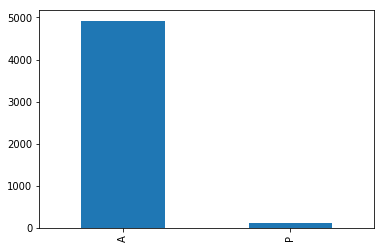

In [27]:
#Make a quick bar chart of the counts of each discharge mean approval category
USGSFlowDataComplete["discharge.mean.approval"].value_counts().plot(kind='bar');

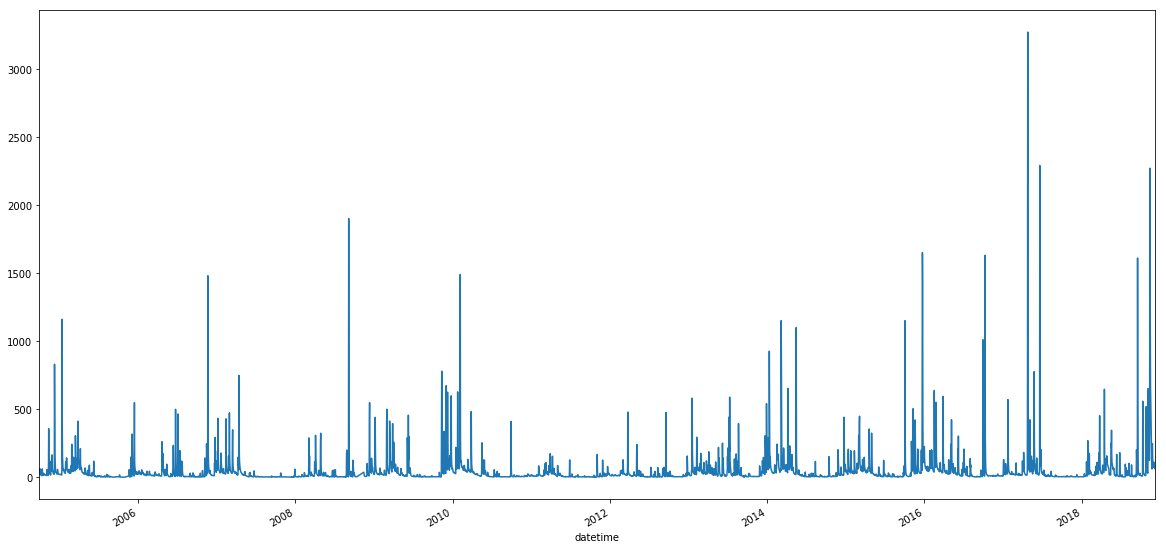

In [39]:
#Plot discharge over time, log transformed
USGSFlowDataComplete.plot(x='datetime',
                          y='discharge.mean', 
                          kind='line',
                          figsize=(20,10),
                          legend=False,
                          logy=False
                         );

In [29]:
#IF plotnine is installed...
from plotnine import *

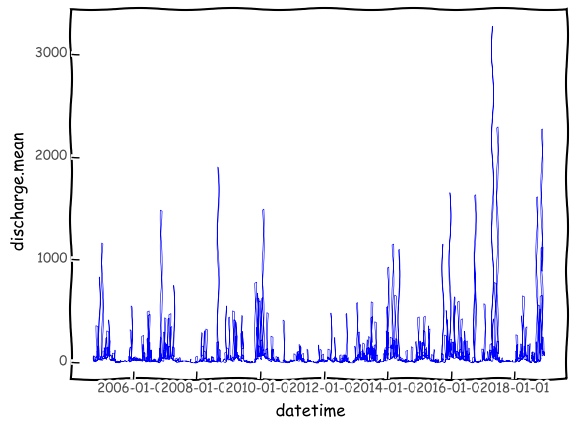

<ggplot: (123520752490)>

In [49]:
myPlot = (ggplot(USGSFlowDataComplete, aes(x='datetime',y='discharge.mean')) + 
          geom_line(color='blue',size=0.25) +
          theme_xkcd()
         )
myPlot

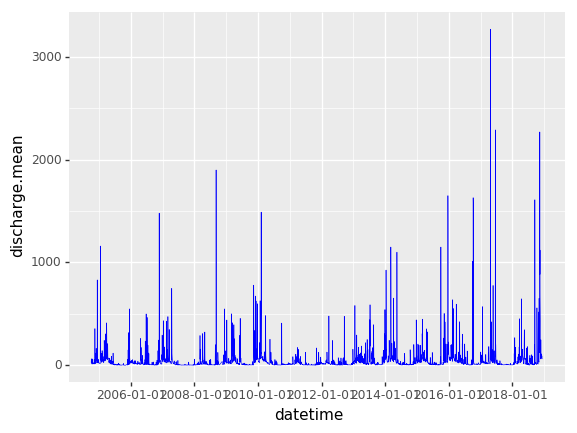

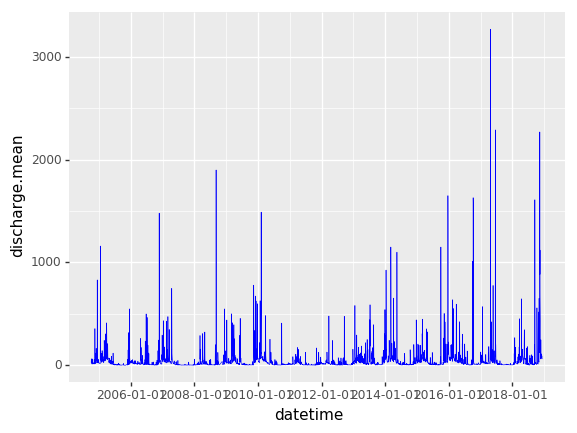

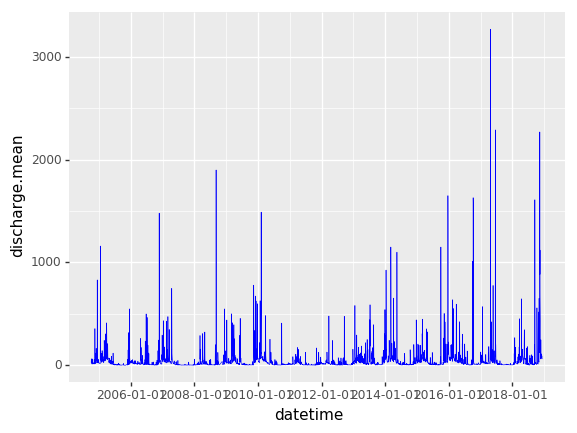

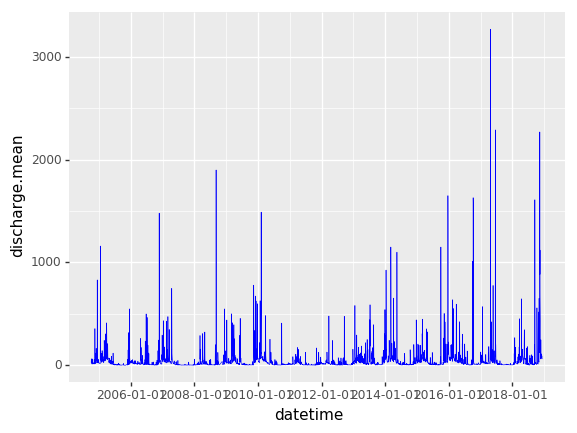

In [48]:
?myPlot